In [196]:
import numpy as np
import os
model_save_root = "sl_model/"
legs = "10"
version = '15'

In [149]:
# !rm -r dataset/leg_3/*
# from google.colab import drive
# drive.mount('/content/drive')

In [197]:
#  actions, data
file_root = f'dataset/leg_{legs}/'
file_list = os.listdir(file_root)
actions = np.load(file_root+'labels.npy')
print(file_list)
print(actions)
# actions

['seq_20231116_끝내다 (4).npy', 'seq_20231116_준비 (7).npy', 'seq_20231116_발표 (7).npy', 'seq_20231116_. (8).npy', 'seq_20231116_발표 (6).npy', 'seq_20231116_질문 (5).npy', 'seq_20231116_질문 (8).npy', 'seq_20231116_발표 (8).npy', 'seq_20231116_끝내다 (6).npy', 'seq_20231116_끝내다 (9).npy', 'seq_20231116_. (2).npy', 'seq_20231116_. (9).npy', 'seq_20231116_담당 (4).npy', 'seq_20231116_질문 (6).npy', 'seq_20231116_. (4).npy', 'seq_20231116_발표 (2).npy', 'seq_20231116_준비 (6).npy', 'seq_20231116_끝내다 (3).npy', 'seq_20231116_발표 (9).npy', 'seq_20231116_제 (10).npy', 'labels.npy', 'seq_20231116_제 (3).npy', 'seq_20231116_담당 (9).npy', 'seq_20231116_제 (1).npy', 'seq_20231116_끝내다 (7).npy', 'seq_20231116_발표 (10).npy', 'seq_20231116_준비 (5).npy', 'seq_20231116_끝내다 (2).npy', 'seq_20231116_발표 (3).npy', 'seq_20231116_. (1).npy', 'seq_20231116_. (5).npy', 'seq_20231116_질문 (4).npy', 'seq_20231116_준비 (10).npy', 'seq_20231116_준비 (3).npy', 'seq_20231116_준비 (9).npy', 'seq_20231116_질문 (2).npy', 'seq_20231116_질문 (9).npy', 'seq_20231116

In [203]:
files = []
for f in file_list:
    if f[:3] == 'seq':
        files.append(f)
len(files)
files.sort()
# files.pop(37)
# files.pop(25)
files

['seq_20231116_ (1).npy',
 'seq_20231116_. (1).npy',
 'seq_20231116_. (10).npy',
 'seq_20231116_. (2).npy',
 'seq_20231116_. (3).npy',
 'seq_20231116_. (4).npy',
 'seq_20231116_. (5).npy',
 'seq_20231116_. (6).npy',
 'seq_20231116_. (7).npy',
 'seq_20231116_. (8).npy',
 'seq_20231116_. (9).npy',
 'seq_20231116_끝내다 (1).npy',
 'seq_20231116_끝내다 (10).npy',
 'seq_20231116_끝내다 (2).npy',
 'seq_20231116_끝내다 (3).npy',
 'seq_20231116_끝내다 (4).npy',
 'seq_20231116_끝내다 (5).npy',
 'seq_20231116_끝내다 (6).npy',
 'seq_20231116_끝내다 (7).npy',
 'seq_20231116_끝내다 (8).npy',
 'seq_20231116_끝내다 (9).npy',
 'seq_20231116_담당 (1).npy',
 'seq_20231116_담당 (10).npy',
 'seq_20231116_담당 (3).npy',
 'seq_20231116_담당 (4).npy',
 'seq_20231116_담당 (9).npy',
 'seq_20231116_발표 (10).npy',
 'seq_20231116_발표 (2).npy',
 'seq_20231116_발표 (3).npy',
 'seq_20231116_발표 (4).npy',
 'seq_20231116_발표 (5).npy',
 'seq_20231116_발표 (6).npy',
 'seq_20231116_발표 (7).npy',
 'seq_20231116_발표 (8).npy',
 'seq_20231116_발표 (9).npy',
 'seq_20231116_제 (

# 데이터 셋 구성
- 예시 (이전코드)
```python
    actions = [
        'come',
        'away',
        'spin'
    ]

    data = np.concatenate([
        np.load('dataset/seq_come_1627646273.npy'),
        np.load('dataset/seq_away_1627646273.npy'),
        np.load('dataset/seq_spin_1627646273.npy')
    ], axis=0)

    data.shape
```

In [204]:
print(files)
# files.pop(7)

data = np.concatenate([np.load(file_root+f) for f in files], axis=0)
print(data.shape)
# idx= 0
# for f in files:
#     print(f'{idx}번째 : file name is {f} - {np.load(file_root+f).shape}')
#     idx += 1

['seq_20231116_ (1).npy', 'seq_20231116_. (1).npy', 'seq_20231116_. (10).npy', 'seq_20231116_. (2).npy', 'seq_20231116_. (3).npy', 'seq_20231116_. (4).npy', 'seq_20231116_. (5).npy', 'seq_20231116_. (6).npy', 'seq_20231116_. (7).npy', 'seq_20231116_. (8).npy', 'seq_20231116_. (9).npy', 'seq_20231116_끝내다 (1).npy', 'seq_20231116_끝내다 (10).npy', 'seq_20231116_끝내다 (2).npy', 'seq_20231116_끝내다 (3).npy', 'seq_20231116_끝내다 (4).npy', 'seq_20231116_끝내다 (5).npy', 'seq_20231116_끝내다 (6).npy', 'seq_20231116_끝내다 (7).npy', 'seq_20231116_끝내다 (8).npy', 'seq_20231116_끝내다 (9).npy', 'seq_20231116_담당 (1).npy', 'seq_20231116_담당 (10).npy', 'seq_20231116_담당 (3).npy', 'seq_20231116_담당 (4).npy', 'seq_20231116_담당 (9).npy', 'seq_20231116_발표 (10).npy', 'seq_20231116_발표 (2).npy', 'seq_20231116_발표 (3).npy', 'seq_20231116_발표 (4).npy', 'seq_20231116_발표 (5).npy', 'seq_20231116_발표 (6).npy', 'seq_20231116_발표 (7).npy', 'seq_20231116_발표 (8).npy', 'seq_20231116_발표 (9).npy', 'seq_20231116_제 (1).npy', 'seq_20231116_제 (2).npy', 

In [205]:
data.shape

(4560, 10, 191)

In [206]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
# print(*labels)
print(*labels)
print(len(actions))

(4560, 10, 190)
(4560,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

# 데이터 입력 전처리
- 예시 (이전코드)
```python
    x_data = data[:, :, :-1]
    labels = data[:, 0, -1]

    print(x_data.shape)
    print(labels.shape)
```

In [207]:
from tensorflow.keras.utils import to_categorical
# actions
# print(labels.shape)
# labels[42][-1]

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(4560, 8)

In [208]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float16)
y_data = y_data.astype(np.float16)
print(x_data.shape)
print(y_data.shape)
# x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 265)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), time_stamp, 61)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4560, 10, 190)
(4560, 8)
(4104, 10, 190) (4104, 8)
(456, 10, 190) (456, 8)


In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

# version 1
model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 64)                65280     
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_1_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
127/129 [============================>.] - ETA: 0s - loss: 3.3088 - acc: 0.8462
Epoch 1: val_acc improved from -inf to 0.94956, saving model to sl_model/10/sl_model_15_1_10.h5
129/129 [==============================] - 5s 21ms/step - loss: 3.2766 - acc: 0.8477 - val_loss: 0.2918 - val_acc: 0.9496 - lr: 0.0010
Epoch 2/100
  7/129 [>.............................] - ETA: 2s - loss: 0.1555 - acc: 0.9643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - ETA: 0s - loss: 0.3130 - acc: 0.9515
Epoch 2: val_acc did not improve from 0.94956
129/129 [==============================] - 4s 28ms/step - loss: 0.3130 - acc: 0.9515 - val_loss: 0.7686 - val_acc: 0.9211 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 0.2070 - acc: 0.9547
Epoch 3: val_acc improved from 0.94956 to 0.97588, saving model to sl_model/10/sl_model_15_1_10.h5
129/129 [==============================] - 3s 26ms/step - loss: 0.2070 - acc: 0.9547 - val_loss: 0.1314 - val_acc: 0.9759 - lr: 0.0010
Epoch 4/100
128/129 [============================>.] - ETA: 0s - loss: 0.0992 - acc: 0.9719
Epoch 4: val_acc did not improve from 0.97588
129/129 [==============================] - 3s 19ms/step - loss: 0.0990 - acc: 0.9720 - val_loss: 0.0820 - val_acc: 0.9737 - lr: 0.0010
Epoch 5/100
127/129 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.9835
Epoch 5: val_acc did not improve from 0.97588
12

In [211]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_1_{legs}.h5')

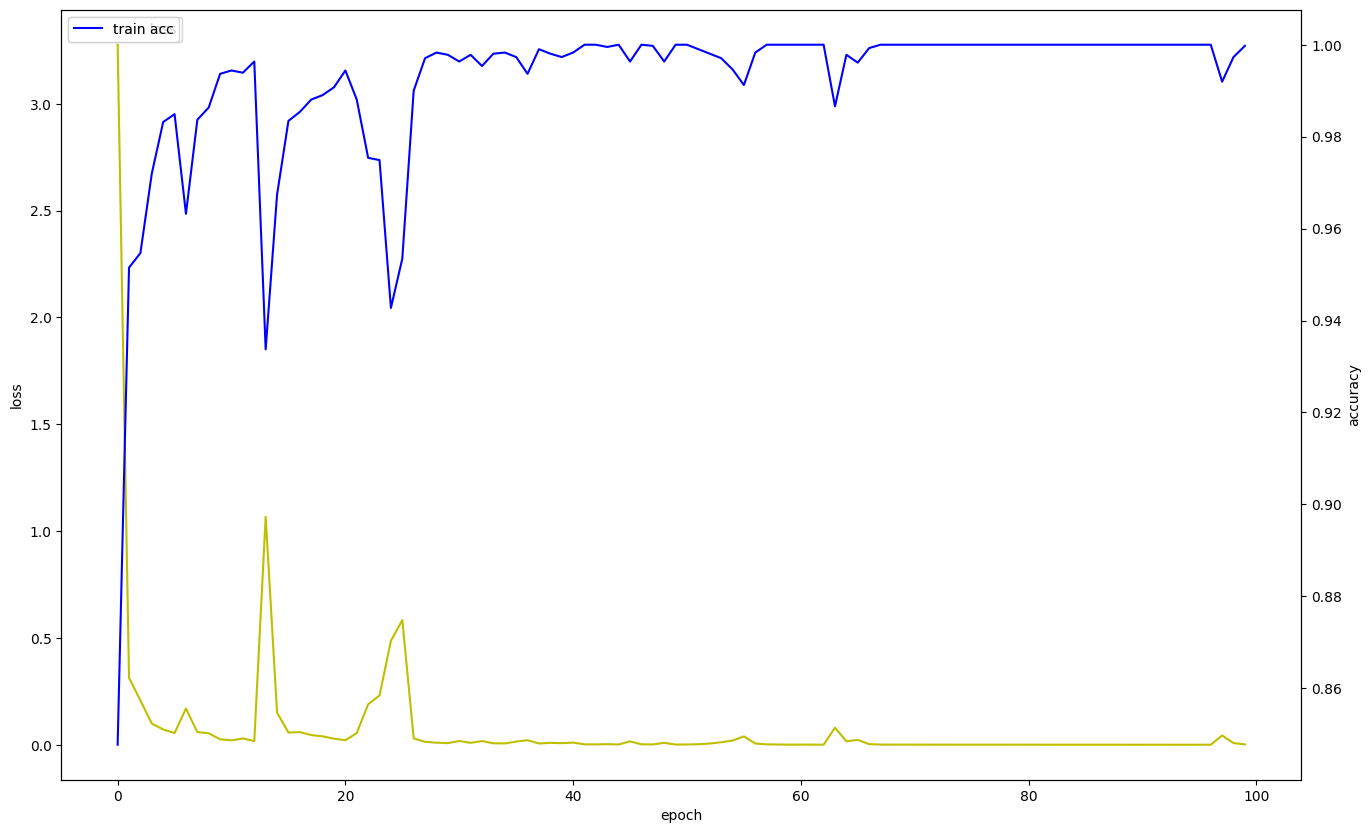

In [212]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_1_acc.png")

In [213]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_1_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [214]:
# version 2

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 64)                65280     
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_2_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
127/129 [============================>.] - ETA: 0s - loss: 5.8690 - acc: 0.7908
Epoch 1: val_acc improved from -inf to 0.88377, saving model to sl_model/10/sl_model_15_2_10.h5
129/129 [==============================] - 5s 22ms/step - loss: 5.8322 - acc: 0.7917 - val_loss: 1.4245 - val_acc: 0.8838 - lr: 0.0010
Epoch 2/150
  8/129 [>.............................] - ETA: 2s - loss: 1.0060 - acc: 0.8789

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126/129 [============================>.] - ETA: 0s - loss: 0.4441 - acc: 0.9144
Epoch 2: val_acc improved from 0.88377 to 0.93421, saving model to sl_model/10/sl_model_15_2_10.h5
129/129 [==============================] - 2s 19ms/step - loss: 0.4403 - acc: 0.9145 - val_loss: 0.2608 - val_acc: 0.9342 - lr: 0.0010
Epoch 3/150
128/129 [============================>.] - ETA: 0s - loss: 0.1588 - acc: 0.9619
Epoch 3: val_acc improved from 0.93421 to 0.96491, saving model to sl_model/10/sl_model_15_2_10.h5
129/129 [==============================] - 3s 20ms/step - loss: 0.1585 - acc: 0.9620 - val_loss: 0.1045 - val_acc: 0.9649 - lr: 0.0010
Epoch 4/150
129/129 [==============================] - ETA: 0s - loss: 0.1011 - acc: 0.9725
Epoch 4: val_acc improved from 0.96491 to 0.97149, saving model to sl_model/10/sl_model_15_2_10.h5
129/129 [==============================] - 4s 33ms/step - loss: 0.1011 - acc: 0.9725 - val_loss: 0.0787 - val_acc: 0.9715 - lr: 0.0010
Epoch 5/150
127/129 [=============

In [217]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_2_{legs}.h5')

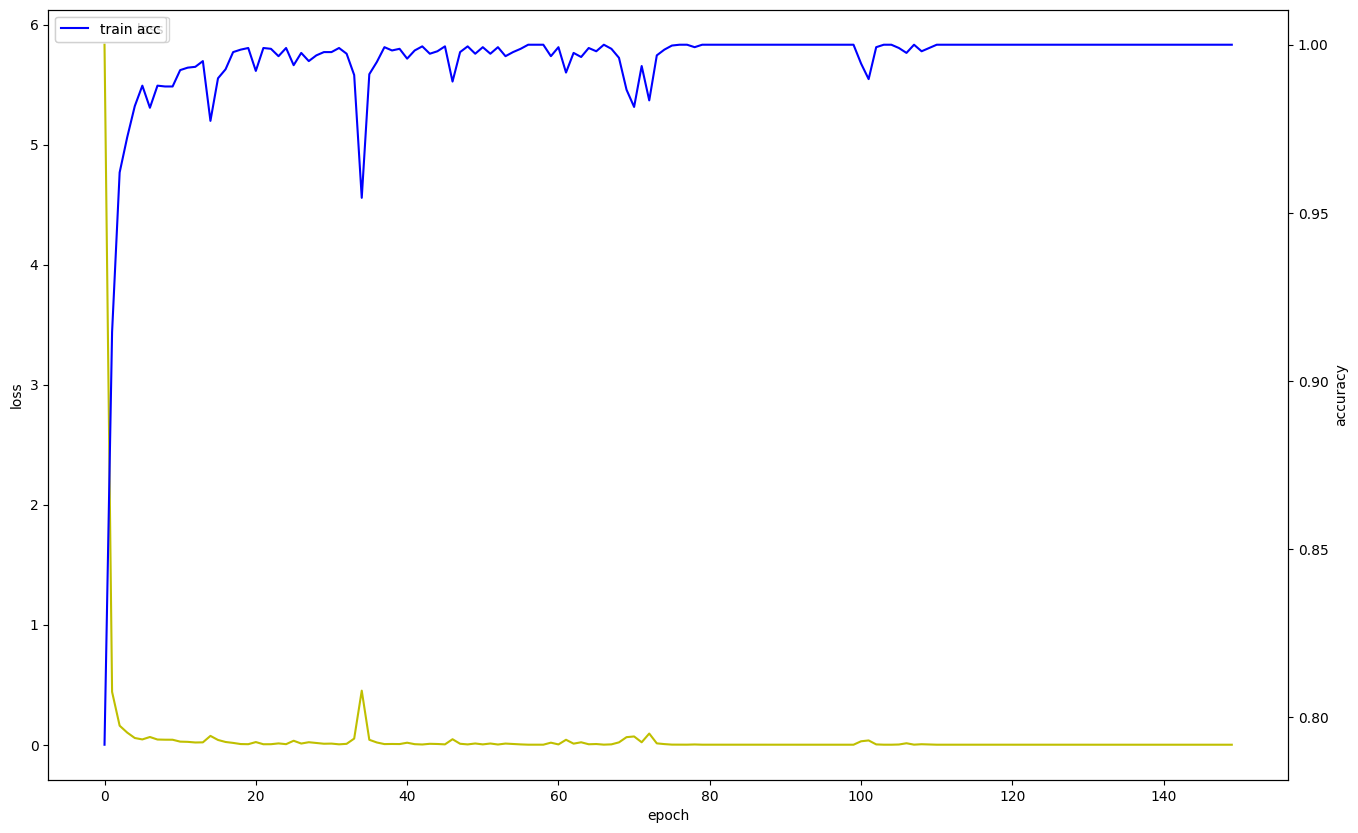

In [218]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [219]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_2_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [220]:
# version 3

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 64)                65280     
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [222]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_3_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
128/129 [============================>.] - ETA: 0s - loss: 4.5548 - acc: 0.8164
Epoch 1: val_acc improved from -inf to 0.87939, saving model to sl_model/10/sl_model_15_3_10.h5
129/129 [==============================] - 4s 21ms/step - loss: 4.5479 - acc: 0.8163 - val_loss: 1.1950 - val_acc: 0.8794 - lr: 0.0010
Epoch 2/200
  7/129 [>.............................] - ETA: 2s - loss: 1.4566 - acc: 0.8214

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - ETA: 0s - loss: 2.2398 - acc: 0.8004
Epoch 2: val_acc did not improve from 0.87939
129/129 [==============================] - 2s 19ms/step - loss: 2.2398 - acc: 0.8004 - val_loss: 1.4133 - val_acc: 0.8553 - lr: 0.0010
Epoch 3/200
129/129 [==============================] - ETA: 0s - loss: 0.7470 - acc: 0.8940
Epoch 3: val_acc improved from 0.87939 to 0.89912, saving model to sl_model/10/sl_model_15_3_10.h5
129/129 [==============================] - 2s 19ms/step - loss: 0.7470 - acc: 0.8940 - val_loss: 0.4937 - val_acc: 0.8991 - lr: 0.0010
Epoch 4/200
128/129 [============================>.] - ETA: 0s - loss: 0.2474 - acc: 0.9353
Epoch 4: val_acc improved from 0.89912 to 0.96272, saving model to sl_model/10/sl_model_15_3_10.h5
129/129 [==============================] - 4s 31ms/step - loss: 0.2474 - acc: 0.9352 - val_loss: 0.1245 - val_acc: 0.9627 - lr: 0.0010
Epoch 5/200
128/129 [============================>.] - ETA: 0s - loss: 0.1767 - acc: 0.

In [223]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_3_{legs}.h5')

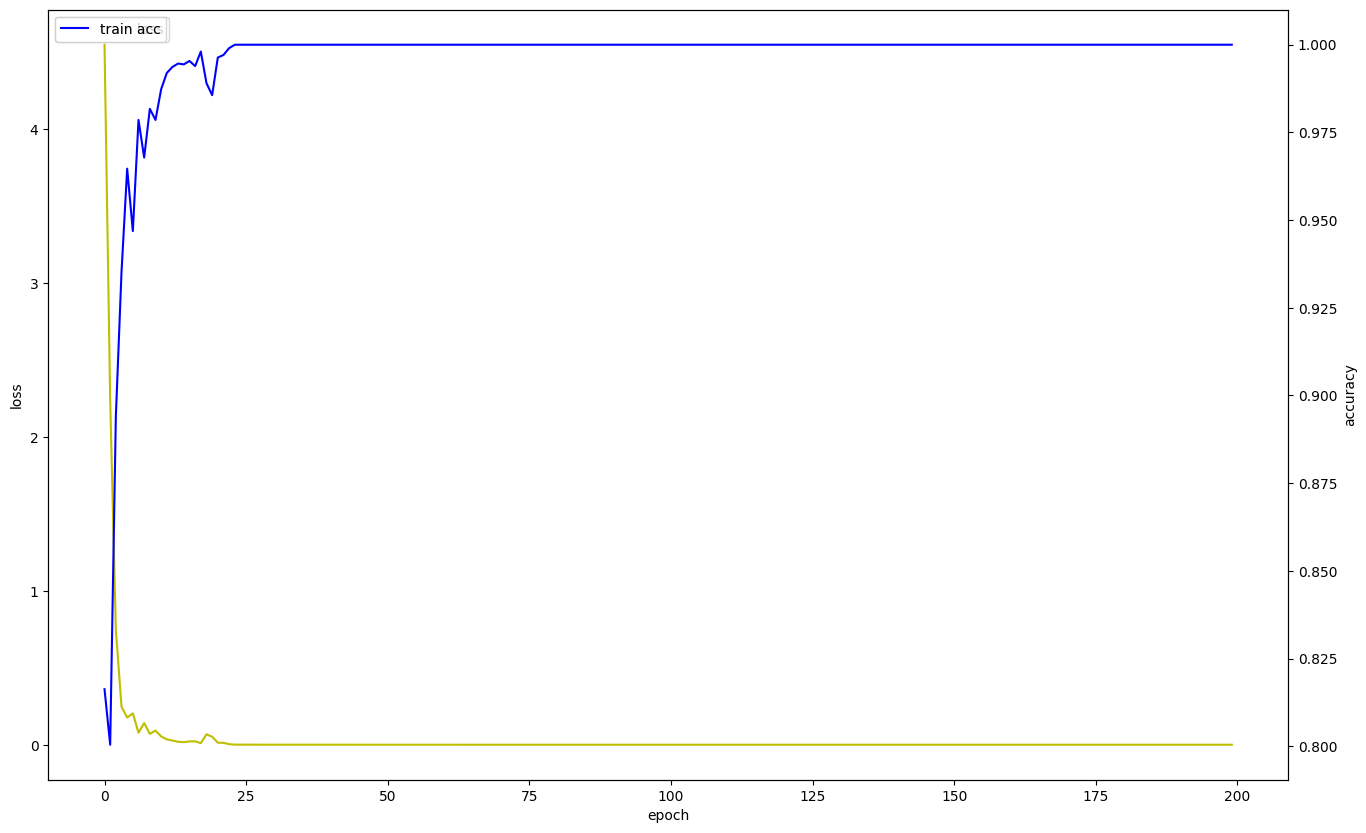

In [224]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [225]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_3_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [226]:
# version 4

In [227]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
print(x_data.shape)
print(y_data.shape)
# x_train = x_data.reshape(int(len(x_data)/time_stamp), time_stamp, 265)
# y_train = y_data.reshape(int(len(y_data)/time_stamp), time_stamp, 61)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4560, 10, 190)
(4560, 8)
(4104, 10, 190) (4104, 8)
(456, 10, 190) (456, 8)


In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 64)                65280     
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_4_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
127/129 [============================>.] - ETA: 0s - loss: 2.3889 - acc: 0.8509
Epoch 1: val_acc improved from -inf to 0.91667, saving model to sl_model/10/sl_model_15_4_10.h5
129/129 [==============================] - 5s 22ms/step - loss: 2.3684 - acc: 0.8516 - val_loss: 0.5421 - val_acc: 0.9167 - lr: 0.0010
Epoch 2/100
  7/129 [>.............................] - ETA: 2s - loss: 0.4847 - acc: 0.9241

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/129 [============================>.] - ETA: 0s - loss: 0.6317 - acc: 0.9204
Epoch 2: val_acc improved from 0.91667 to 0.94518, saving model to sl_model/10/sl_model_15_4_10.h5
129/129 [==============================] - 3s 22ms/step - loss: 0.6306 - acc: 0.9206 - val_loss: 0.5995 - val_acc: 0.9452 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 0.2577 - acc: 0.9544
Epoch 3: val_acc improved from 0.94518 to 0.98246, saving model to sl_model/10/sl_model_15_4_10.h5
129/129 [==============================] - 4s 32ms/step - loss: 0.2577 - acc: 0.9544 - val_loss: 0.1073 - val_acc: 0.9825 - lr: 0.0010
Epoch 4/100
128/129 [============================>.] - ETA: 0s - loss: 0.1416 - acc: 0.9727
Epoch 4: val_acc did not improve from 0.98246
129/129 [==============================] - 2s 19ms/step - loss: 0.1414 - acc: 0.9727 - val_loss: 0.0937 - val_acc: 0.9759 - lr: 0.0010
Epoch 5/100
128/129 [============================>.] - ETA: 0s - loss: 0.0771 - acc: 0.

In [230]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_4_{legs}.h5')

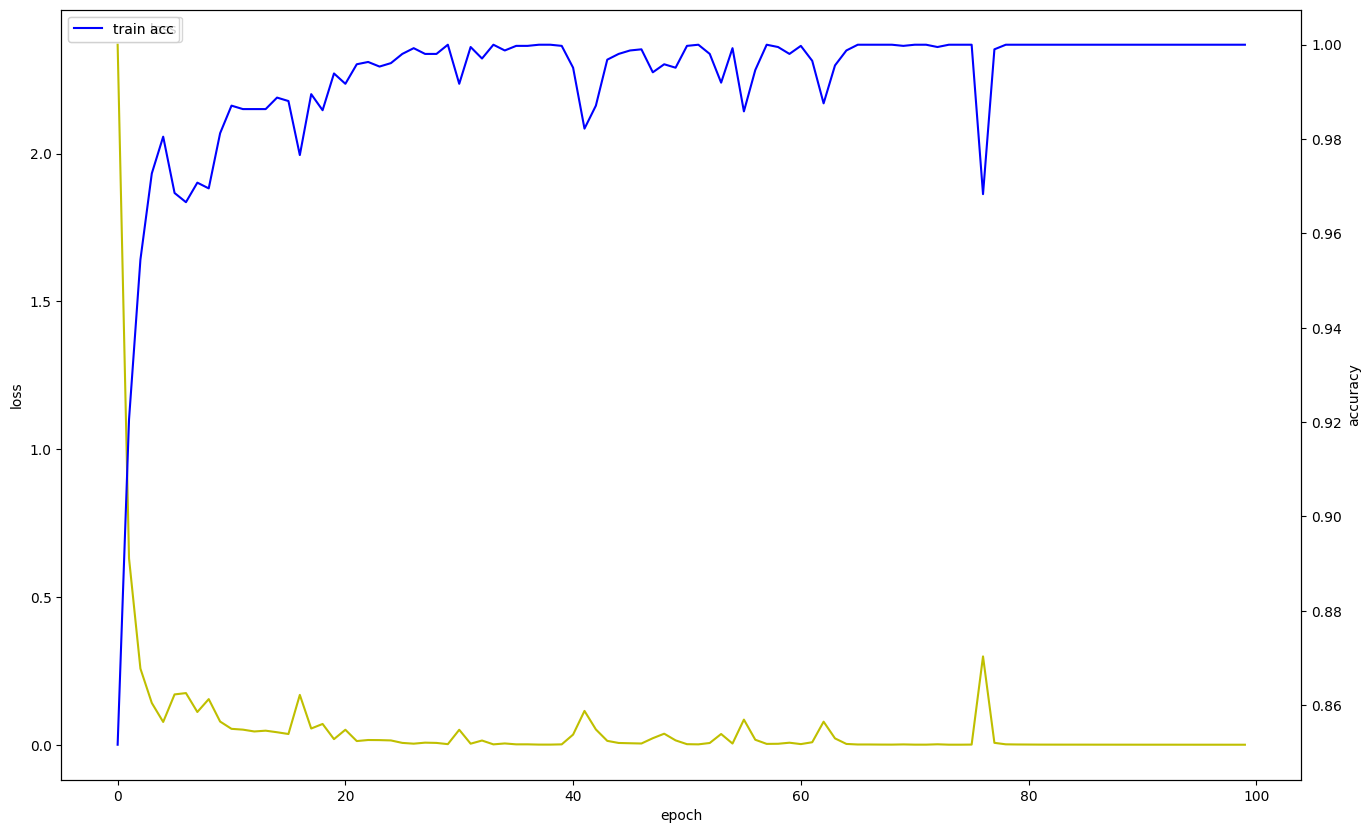

In [231]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [232]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_4_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [233]:
# version 5

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 64)                65280     
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_5_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
127/129 [============================>.] - ETA: 0s - loss: 1.4514 - acc: 0.8349
Epoch 1: val_acc improved from -inf to 0.91447, saving model to sl_model/10/sl_model_15_5_10.h5
129/129 [==============================] - 6s 25ms/step - loss: 1.4374 - acc: 0.8365 - val_loss: 0.2649 - val_acc: 0.9145 - lr: 0.0010
Epoch 2/150
  8/129 [>.............................] - ETA: 2s - loss: 0.2088 - acc: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/129 [============================>.] - ETA: 0s - loss: 0.1097 - acc: 0.9702
Epoch 2: val_acc improved from 0.91447 to 0.98684, saving model to sl_model/10/sl_model_15_5_10.h5
129/129 [==============================] - 2s 18ms/step - loss: 0.1096 - acc: 0.9703 - val_loss: 0.0488 - val_acc: 0.9868 - lr: 0.0010
Epoch 3/150
127/129 [============================>.] - ETA: 0s - loss: 0.0657 - acc: 0.9872
Epoch 3: val_acc did not improve from 0.98684
129/129 [==============================] - 3s 19ms/step - loss: 0.0653 - acc: 0.9873 - val_loss: 0.0360 - val_acc: 0.9868 - lr: 0.0010
Epoch 4/150
127/129 [============================>.] - ETA: 0s - loss: 0.0393 - acc: 0.9919
Epoch 4: val_acc did not improve from 0.98684
129/129 [==============================] - 3s 20ms/step - loss: 0.0390 - acc: 0.9920 - val_loss: 0.0526 - val_acc: 0.9759 - lr: 0.0010
Epoch 5/150
128/129 [============================>.] - ETA: 0s - loss: 0.0727 - acc: 0.9814
Epoch 5: val_acc did not improve from 0.98684
12

In [236]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_5_{legs}.h5')

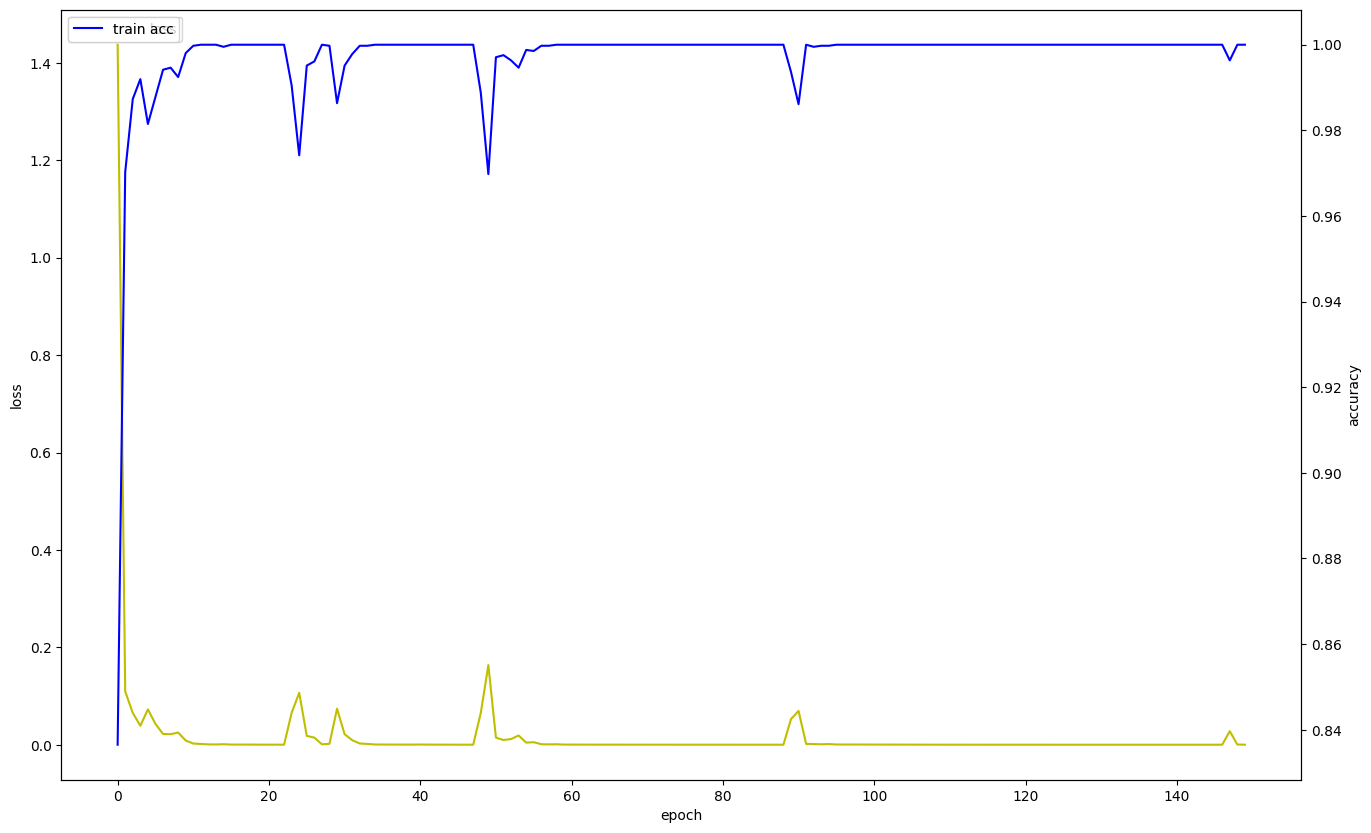

In [237]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [238]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_5_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [239]:
# version 6

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 64)                65280     
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 8)                 264       
                                                                 
Total params: 67624 (264.16 KB)
Trainable params: 67624 (264.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [241]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'{model_save_root}{legs}/sl_model_{version}_6_{legs}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
128/129 [============================>.] - ETA: 0s - loss: 0.6807 - acc: 0.8752
Epoch 1: val_acc improved from -inf to 0.94737, saving model to sl_model/10/sl_model_15_6_10.h5
129/129 [==============================] - 5s 20ms/step - loss: 0.6798 - acc: 0.8752 - val_loss: 0.2108 - val_acc: 0.9474 - lr: 0.0010
Epoch 2/200
  9/129 [=>............................] - ETA: 1s - loss: 0.1977 - acc: 0.9479

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - ETA: 0s - loss: 0.1449 - acc: 0.9600
Epoch 2: val_acc improved from 0.94737 to 0.96711, saving model to sl_model/10/sl_model_15_6_10.h5
129/129 [==============================] - 2s 19ms/step - loss: 0.1449 - acc: 0.9600 - val_loss: 0.1124 - val_acc: 0.9671 - lr: 0.0010
Epoch 3/200
128/129 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9836
Epoch 3: val_acc improved from 0.96711 to 0.98246, saving model to sl_model/10/sl_model_15_6_10.h5
129/129 [==============================] - 2s 19ms/step - loss: 0.0646 - acc: 0.9837 - val_loss: 0.0498 - val_acc: 0.9825 - lr: 0.0010
Epoch 4/200
127/129 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9865
Epoch 4: val_acc did not improve from 0.98246
129/129 [==============================] - 2s 18ms/step - loss: 0.0515 - acc: 0.9861 - val_loss: 0.0555 - val_acc: 0.9781 - lr: 0.0010
Epoch 5/200
127/129 [============================>.] - ETA: 0s - loss: 0.0970 - acc: 0.

In [242]:
model.save(f'{model_save_root}{legs}/sl_model_v{version}_6_{legs}.h5')

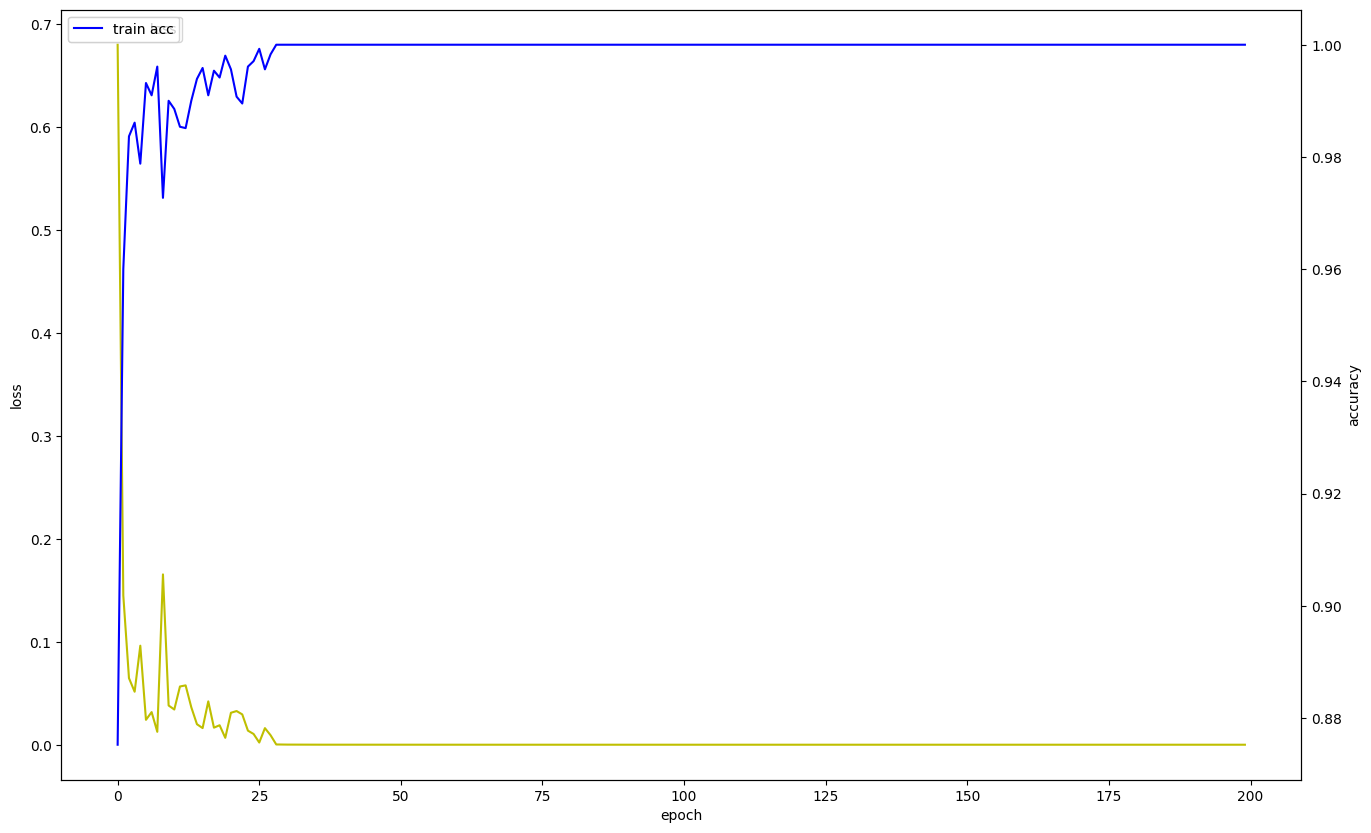

In [243]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()
# acc_ax.savefig("model_v14_2_acc.png")

In [244]:
import tensorflow as tf

# 모델을 TFLite로 변환할 때 GPU Delegate를 사용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.target_spec.supported_backends = [tf.lite.TFLITE_GPU]

tflite_model = converter.convert()


# Save the model.
with open(f'{model_save_root}{legs}/sl_model_v{version}_6_{legs}.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/sl_model_v10_1.h5')

# y_pred = model.predict(x_val)

# multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

In [ ]:
from collections import defaultdict
test_list = os.listdir('test_data/')
test = []
# actions = ["", "가다", "감사합니다", "강아지", "덥다", "돼지", "먹다", "무엇", "반갑다", "석사", "아침", "안녕하세요", "연구", "오늘", "오후", "저녁", "졸리다", "좋다", "질문", "할아버지"]
actions =  {'': 0, '가다': 1, '감사합니다': 2, '강아지': 3, '덥다': 4, '돼지': 5, '먹다': 6, '무엇': 7, '반갑다': 8, '석사': 9, '아침': 10, '안녕하세요': 11, '연구': 12, '오늘': 13, '오후': 14, '저녁': 15, '졸리다': 16, '좋다': 17, '질문': 18, '할아버지': 19}
print(actions)
print(test_list)
for test_data in test_list:
    # test.append(np.load('test_data/'+test_data))
    if test_data[-3:] == "npy":
        t= np.load('test_data/'+test_data)
        test_x = t.astype(np.float32)
        print(test_x.shape)
        # test_x = test_x[:, :, :-1]
        y = model.predict(test_x)
        # idx = 0
        # print(y.shape)
        # break
        t = list(y)
        maxV = defaultdict(int)
        for i in t:
            for j in range(len(i)):
                if i[j] > 0.8:
                    maxV[j] += 1
        if test_data[13:-8] in actions.keys():
            print(f'{test_data[13:-8]} {actions[test_data[13:-8]]} : {maxV}')
        else:
            print(f'{test_data[13:-8]} : {maxV}')
        # print(f'{test_data[6:11]} : {t}')


{'': 0, '가다': 1, '감사합니다': 2, '강아지': 3, '덥다': 4, '돼지': 5, '먹다': 6, '무엇': 7, '반갑다': 8, '석사': 9, '아침': 10, '안녕하세요': 11, '연구': 12, '오늘': 13, '오후': 14, '저녁': 15, '졸리다': 16, '좋다': 17, '질문': 18, '할아버지': 19}
['seq_20231108_졸리다 (0).npy', 'seq_20231108_강아지 (0).npy', 'seq_20231108_돼지 (0).npy', 'seq_20231108_아침 (0).npy', 'seq_20231108_물음표 (0).npy', 'seq_20231108_오후 (0).npy', 'seq_20231108_저녁 (0).npy', 'seq_20231108_먹다 (0).npy', 'seq_20231108_오늘 (0).npy', 'seq_20231108_덥다 (0).npy', 'seq_20231108_할아버지 (0).npy', 'seq_20231108_단추 (0).npy', 'seq_20231108_반갑다 (0).npy', 'seq_20231108_가다 (0).npy', 'seq_20231108_좋다 (0).npy']
(64, 5, 265)
2/2 [==============================] - 0s 9ms/step
졸리다 16 : defaultdict(<class 'int'>, {16: 39, 18: 6, 1: 13, 11: 1})
(78, 5, 265)
3/3 [==============================] - 0s 5ms/step
강아지 3 : defaultdict(<class 'int'>, {13: 13, 3: 42, 9: 1, 11: 17})
(65, 5, 265)
3/3 [==============================] - 0s 5ms/step
돼지 5 : defaultdict(<class 'int'>, {5: 52, 15: 2, 2: 1, 18: 1, 1

In [ ]:
# x_train[0]
test_x = np.load('test_data/seq_20231103_103347_석사.npy')
print(*test_x)
# test_x = test_x.astype(np.float32)
# test_x = data[:, :-1]
# test_x.shape
# test_x = test_x.reshape(int(len(test_x)/1), 1, 265)
# y = model.predict(test_x)
# # # max(*y)
# # # len(y)
# # # for k in y[0]:
# # #     print(k)
# t = list(y[0])
# t
# # idx = 0
# # for i in range(len(t)):
# #     if t[idx] < t[i]:
# #         idx = i
# # print(idx)
# # actions[idx]

[ 2.88650960e-01  4.54140574e-01 -9.20067151e-08  2.83450752e-01
  4.25085038e-01 -1.74491666e-02  2.90977776e-01  3.98849368e-01
 -2.57346518e-02  3.07855248e-01  3.90133023e-01 -3.17503959e-02
  3.21066618e-01  3.86762977e-01 -3.62901613e-02  3.10329705e-01
  3.78567129e-01 -2.22247373e-02  3.29251975e-01  3.51809084e-01
 -3.92986126e-02  3.44006181e-01  3.36510122e-01 -5.13615496e-02
  3.57950598e-01  3.23419809e-01 -5.99384643e-02  3.26524377e-01
  3.93446445e-01 -2.06778906e-02  3.36806953e-01  3.87588620e-01
 -4.03469354e-02  3.23700786e-01  4.03884083e-01 -4.61783521e-02
  3.12210709e-01  4.14488256e-01 -4.75531593e-02  3.37758005e-01
  4.10068482e-01 -2.15034410e-02  3.47380042e-01  4.07968313e-01
 -3.95072959e-02  3.36125463e-01  4.21923012e-01 -3.88631076e-02
  3.26398373e-01  4.30245042e-01 -3.53271961e-02  3.43842983e-01
  4.27265763e-01 -2.40988843e-02  3.51555705e-01  4.28783119e-01
 -3.74899395e-02  3.45076233e-01  4.37564820e-01 -3.83166708e-02
  3.37202847e-01  4.43119